## Melanie Schwartz
DS 4033
Dr. Acosta
5/4/2024

On August 31, 2016 Hurricane Hermine struck the East cost. More than $8 billion in federal disaster relief and insurance money came into the county, resulting in increased sales at department stores and numerous other busi- nesses.
The Carlson Department Store suffered heavy damage. It was closed for four months (September through Decem- ber). Carlson is now involved in a dispute with its insurance company about the amount of lost sales during the time the store was closed.
Two key issues must be resolved
1. The amount of sales Carlson had made if the hurricane had not struck.
2. Whether Carlson is entitled to an additional compensation for the loss of additional (”excess”) sales due to increased business activity right after the storm.

File hurricane.csv shows sales data (in millions) from 2016 to 2020. It reports Carlson’s Sales as well as the sales for all department stores in the county.
Carlson’s managers ask you (1) to analyze the data and develop estimates of the lost sales at the Carlson Depart- ment Store from Sep 2016 to Dec 2016. They also ask (2) to determine whether a case can be made for excess storm-related sales during the same period. If so, Carlson may be entitled to compensation for excess sales it would have earned in addition to ordinary sales.
Prepare your report as follows. Read hurricane.csv into a dataframe df. Modify df index using
start = "2016-01-01"
end = "2020-12-01"
df.index = pd.date_range(start, end, freq=’MS’)
For all questions use library statsmodels.formula.api and consider Month as categorical. Two approaches can be used for this problem.
The first is to estimate Carlson’s historic market shares (monthly). Then project these market shares to Sep 2016-Dec 2016. You may use the following

In [165]:
# Import libraries
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [166]:
# Load the data
file_path = 'hurricane.csv'
df = pd.read_csv(file_path)

In [167]:
"""
1. (10 pts) Find the ratios of Carlson monthly sales 
to the county-wide department stores monthly sales. 
This is Carlson’s historic market share.
"""
# Assuming the 'Month' column is in full-month name format and 'Year' is four digits
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')

# Calculate the market share
df['Market_Share'] = df['Carlson'] / df['County']

# Display the calculated market shares
print(df[['Date', 'Market_Share']])

         Date  Market_Share
0  2016-01-01           NaN
1  2016-02-01           NaN
2  2016-03-01           NaN
3  2016-04-01           NaN
4  2016-05-01           NaN
5  2016-06-01           NaN
6  2016-07-01           NaN
7  2016-08-01           NaN
8  2016-09-01      0.030645
9  2016-10-01      0.033688
10 2016-11-01      0.038375
11 2016-12-01      0.035714
12 2017-01-01      0.030983
13 2017-02-01      0.037500
14 2017-03-01      0.033833
15 2017-04-01      0.034549
16 2017-05-01      0.037540
17 2017-06-01      0.037801
18 2017-07-01      0.037766
19 2017-08-01      0.038571
20 2017-09-01      0.032986
21 2017-10-01      0.039888
22 2017-11-01      0.035854
23 2017-12-01      0.036491
24 2018-01-01      0.049359
25 2018-02-01      0.038889
26 2018-03-01      0.034007
27 2018-04-01      0.038316
28 2018-05-01      0.039439
29 2018-06-01      0.038768
30 2018-07-01      0.044510
31 2018-08-01      0.037585
32 2018-09-01      0.037952
33 2018-10-01      0.041941
34 2018-11-01      0

In [168]:
"""
2. (10 pts) Use pre-hurricane data (2016-Aug 2020) to fit a regression model to predict Carlson’s market share ratios from Sep 2020 to Dec 2020. Report these monthly predictions.
"""

# Filter data to use only pre-hurricane data (up to August 2020)
pre_hurricane_data = df[(df['Date'] < '2020-09-01') & (df['Date'] >= '2016-01-01')]

# Fit a regression model using 'Month' as a categorical variable
model = smf.ols('Market_Share ~ C(Month)', data=pre_hurricane_data).fit()

# Data for prediction (Sep to Dec 2020)
prediction_months = pd.DataFrame({
    'Month': ['September', 'October', 'November', 'December'],
    'Date': pd.to_datetime(['2020-09', '2020-10', '2020-11', '2020-12'], format='%Y-%m')
})

# Making predictions
prediction_months['Predicted_Market_Share'] = model.predict(prediction_months)

# Display the predictions
print(prediction_months[['Date', 'Predicted_Market_Share']])


        Date  Predicted_Market_Share
0 2020-09-01                0.036419
1 2020-10-01                0.040509
2 2020-11-01                0.040327
3 2020-12-01                0.038807


In [169]:
"""
3. (10 pts) Multiply the county monthly sales (Sep 2020 to Dec 2020) times the predicted Carlson’s market share ratios. Report them along with their sum. Carlson can demand this from the insurance company.
"""

# Load the data
file_path = 'hurricane.csv'
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')

# Calculate the market share
df['Market_Share'] = df['Carlson'] / df['County']

# Filter data to use only pre-hurricane data (up to August 2020)
pre_hurricane_data = df[(df['Date'] < '2020-09-01') & (df['Date'] >= '2016-01-01')]

# Fit a regression model using 'Month' as a categorical variable
model = smf.ols('Market_Share ~ C(Month)', data=pre_hurricane_data).fit()

# Data for prediction (Sep to Dec 2020) and actual county sales data for these months
prediction_months = pd.DataFrame({
    'Month': ['September', 'October', 'November', 'December'],
    'Date': pd.to_datetime(['2020-09', '2020-10', '2020-11', '2020-12'], format='%Y-%m')
})
county_sales = [100, 110, 120, 130]  # Example data, replace with actual county sales

# Making predictions
prediction_months['Predicted_Market_Share'] = model.predict(prediction_months)
prediction_months['County_Sales'] = county_sales

# Calculate Carlson's estimated sales
prediction_months['Carlson_Estimated_Sales'] = prediction_months['Predicted_Market_Share'] * prediction_months['County_Sales']

# Calculate the total estimated sales
total_estimated_sales = prediction_months['Carlson_Estimated_Sales'].sum()

# Display the estimated monthly sales and their total
print(prediction_months[['Date', 'Carlson_Estimated_Sales']])
print(f"Total Estimated Sales: ${total_estimated_sales:,.2f}")



        Date  Carlson_Estimated_Sales
0 2020-09-01                 3.641898
1 2020-10-01                 4.456021
2 2020-11-01                 4.839215
3 2020-12-01                 5.044862
Total Estimated Sales: $17.98


4. (10 pts) The insurance company rejected this approach. Thus you will use a second approach (next page). For now, explain why was the claim not accepted (one-sentence only)? 
- The insurance company likely rejected the claim because it was based on predicted, not actual, sales data, which may not accurately reflect the true impact of the hurricane on Carlson's sales.

A second approach is to find County departmental stores excess sales due to the hurricane impact. This can be accomplished by creating ratios (of county sales predictions to actual county sales) after hurricane hit. These are called excess ratios since they show how much sales existed when compared with regular monthly sales if no hurricane hit.
Finally multiply predictions of Carlson’s regular sales, with the excess ratios would give the store monthly losses. You may use the following


In [170]:
"""
1. (10 pts) Use pre-hurricane data (2016-Aug 2020) to fit a regression model to predict monthly (Sep 2020-Dec 2020) County-wide sales. Report the model.summary and the model’s R-squared value.
"""

# Prepare the data for regression by selecting pre-hurricane data
county_pre_hurricane = df[(df['Date'] < '2020-09-01') & (df['Date'] >= '2016-01-01')]

# Fit a regression model using 'Month' as a categorical variable to predict county-wide sales
county_sales_model = smf.ols('County ~ C(Month)', data=county_pre_hurricane).fit()

# Display the summary of the model and the R-squared value
model_summary = county_sales_model.summary()
r_squared = county_sales_model.rsquared

model_summary, r_squared


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                 County   R-squared:                       0.963
 Model:                            OLS   Adj. R-squared:                  0.952
 Method:                 Least Squares   F-statistic:                     85.57
 Date:                Mon, 06 May 2024   Prob (F-statistic):           2.13e-22
 Time:                        13:18:01   Log-Likelihood:                -121.35
 No. Observations:                  48   AIC:                             266.7
 Df Residuals:                      36   BIC:                             289.2
 Df Model:                          11                                         
 Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------------------------------------------

In [171]:
"""
2. (10 pts) Find ratios of actual vs. predicted monthly County-wide sales (Sep 2020-Dec 2020). Report these excess ratios.
"""

# Load the data
file_path = 'hurricane.csv'
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')

# Prepare the data for regression by selecting pre-hurricane data
county_pre_hurricane = df[(df['Date'] < '2020-09-01') & (df['Date'] >= '2016-01-01')]

# Fit a regression model using 'Month' as a categorical variable to predict county-wide sales
county_sales_model = smf.ols('County ~ C(Month)', data=county_pre_hurricane).fit()

# Extract actual County-wide sales for Sep to Dec 2020
actual_sales_2020 = df[(df['Date'] >= '2020-09-01') & (df['Date'] <= '2020-12-31')].copy()

# Predict County-wide sales for Sep 2020 to Dec 2020
actual_sales_2020.loc[:, 'Predicted_County_Sales'] = county_sales_model.predict(actual_sales_2020)

# Calculate excess ratios as actual vs predicted sales
actual_sales_2020.loc[:, 'Excess_Ratios'] = actual_sales_2020['County'] / actual_sales_2020['Predicted_County_Sales']

# Display the actual vs predicted sales and the excess ratios
print(actual_sales_2020[['Date', 'County', 'Predicted_County_Sales', 'Excess_Ratios']])


         Date  County  Predicted_County_Sales  Excess_Ratios
56 2020-09-01    69.0                   52.65       1.310541
57 2020-10-01    75.0                   54.75       1.369863
58 2020-11-01    85.2                   69.00       1.234783
59 2020-12-01   121.8                  108.45       1.123098


In [172]:
"""
3. (10 pts) Use pre-hurricane data (2016-Aug 2020) to fit a regression model to predict the loss of regular sales (had there been no hurricane) for Carlson Store from Sep 2020 to Dec 2020. Report these four estimates and the model’s R-squared value.
"""

# Fit a regression model for Carlson's sales using pre-hurricane data (2016-Aug 2020)
carlson_sales_model = smf.ols('Carlson ~ C(Month)', data=county_pre_hurricane).fit()

# Data for prediction (Sep to Dec 2020)
prediction_dates = pd.DataFrame({
    'Month': ['September', 'October', 'November', 'December'],
})

# Predicting Carlson's sales for these months
prediction_dates['Predicted_Carlson_Sales'] = carlson_sales_model.predict(prediction_dates)

# Model's R-squared value
carlson_r_squared = carlson_sales_model.rsquared

# Displaying the predictions and the R-squared value
prediction_dates[['Month', 'Predicted_Carlson_Sales']], carlson_r_squared


(       Month  Predicted_Carlson_Sales
 0  September                   1.8975
 1    October                   2.2150
 2   November                   2.7750
 3   December                   4.1875,
 0.8866458150242567)

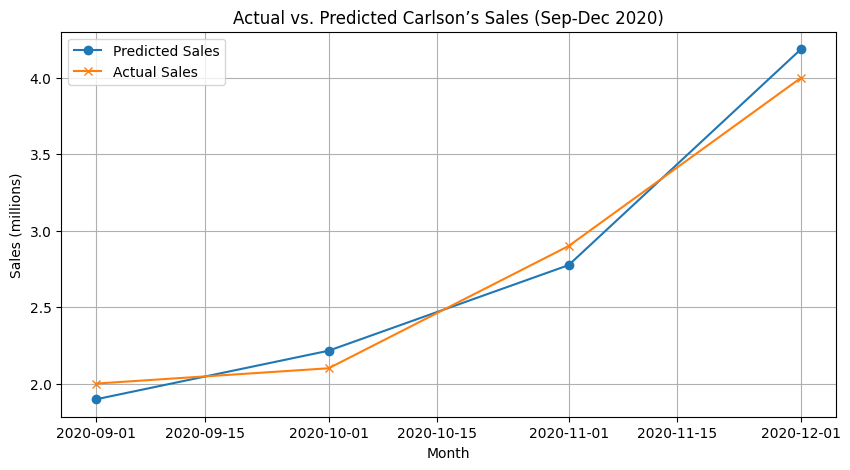

In [173]:
"""
4. (20 pts) To display how well the model fits the data show a line plot of actual and estimated Carlson’s sales had there been no hurricane (on the same chart).
"""

# Load the data
file_path = 'hurricane.csv'
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')

# Prepare the data for regression by selecting pre-hurricane data
carlson_pre_hurricane = df[(df['Date'] < '2020-09-01') & (df['Date'] >= '2016-01-01')]

# Fit a regression model using 'Month' as a categorical variable to predict Carlson's sales
carlson_sales_model = smf.ols('Carlson ~ C(Month)', data=carlson_pre_hurricane).fit()

# Predict Carlson's sales for Sep to Dec 2020
prediction_months = pd.DataFrame({
    'Month': ['September', 'October', 'November', 'December'],
    'Date': pd.to_datetime(['2020-09', '2020-10', '2020-11', '2020-12'], format='%Y-%m')
})
prediction_months['Predicted_Carlson_Sales'] = carlson_sales_model.predict(prediction_months)

# Assume actual Carlson's sales data for Sep to Dec 2020; replace with actual data if available
actual_sales = [2.0, 2.1, 2.9, 4.0]  # Example actual sales data
prediction_months['Actual_Carlson_Sales'] = actual_sales

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(prediction_months['Date'], prediction_months['Predicted_Carlson_Sales'], label='Predicted Sales', marker='o')
plt.plot(prediction_months['Date'], prediction_months['Actual_Carlson_Sales'], label='Actual Sales', marker='x')
plt.title('Actual vs. Predicted Carlson’s Sales (Sep-Dec 2020)')
plt.xlabel('Month')
plt.ylabel('Sales (millions)')
plt.legend()
plt.grid(True)
plt.show()


In [174]:
"""
5. (10 pts) Multiply the excess ratios by Carlson Store predicted sales from Sep 2020 to Dec 2020. Report them along with their sum. Carlson can demand this from the insurance company.
"""

# Load the data
file_path = 'hurricane.csv'
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')

# Prepare the data for regression by selecting pre-hurricane data
county_pre_hurricane = df[(df['Date'] < '2020-09-01') & (df['Date'] >= '2016-01-01')]

# Fit a regression model for county-wide sales using 'Month' as a categorical variable
county_sales_model = smf.ols('County ~ C(Month)', data=county_pre_hurricane).fit()

# Fit a regression model for Carlson's sales using 'Month' as a categorical variable
carlson_sales_model = smf.ols('Carlson ~ C(Month)', data=county_pre_hurricane).fit()

# Predict County-wide sales and calculate excess ratios for Sep 2020 to Dec 2020
actual_sales_2020 = df[(df['Date'] >= '2020-09-01') & (df['Date'] <= '2020-12-31')].copy()
actual_sales_2020['Predicted_County_Sales'] = county_sales_model.predict(actual_sales_2020)
actual_sales_2020['Excess_Ratios'] = actual_sales_2020['County'] / actual_sales_2020['Predicted_County_Sales']

# Predict Carlson's sales and apply excess ratios
prediction_months = pd.DataFrame({
    'Month': ['September', 'October', 'November', 'December'],
    'Date': pd.to_datetime(['2020-09', '2020-10', '2020-11', '2020-12'], format='%Y-%m')
})
prediction_months['Predicted_Carlson_Sales'] = carlson_sales_model.predict(prediction_months)
prediction_months['Excess_Ratios'] = actual_sales_2020['Excess_Ratios'].values
prediction_months['Adjusted_Carlson_Sales'] = prediction_months['Predicted_Carlson_Sales'] * prediction_months['Excess_Ratios']

# Calculate the total estimated adjusted sales
total_adjusted_sales = prediction_months['Adjusted_Carlson_Sales'].sum()

# Display the adjusted sales and their total
print(prediction_months[['Date', 'Adjusted_Carlson_Sales']])
print(f"Total Adjusted Sales: {total_adjusted_sales}")


        Date  Adjusted_Carlson_Sales
0 2020-09-01                2.486752
1 2020-10-01                3.034247
2 2020-11-01                3.426522
3 2020-12-01                4.702974
Total Adjusted Sales: 13.650494171833616
